<h1>Time Series Analysis on Daily Data<h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [2]:
## Importing Data
df = pd.read_csv('hotel_bookings.csv')

## Show the first 5 rows of Data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [4]:
missing = df.isna().mean().round(4) * 100
missing

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [5]:
def empty(rn):
    id=0
    count=[]
    for i in (rn.isna()):
        if i:
            count.append(id)
            id+=1
        else:
            id+=1
    return count

In [6]:
df.country.fillna(method='ffill',inplace = True)

In [7]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [8]:
#No agent - NaN for agent implies booking made without an agent
df = df.fillna({"agent":0 , "company":0 , "children":0})

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [10]:
no_guests = list(df.loc[df["adults"] + df["children"]+ df["babies"]==0].index)
print(no_guests)


[2224, 2409, 3181, 3684, 3708, 4127, 9376, 31765, 32029, 32827, 34849, 34855, 37459, 40392, 40922, 41020, 41056, 42452, 42591, 42871, 42934, 47166, 47180, 47444, 49264, 50701, 50702, 54025, 54037, 54047, 54093, 55809, 60651, 61244, 61245, 61249, 62967, 63796, 64782, 65907, 65908, 65909, 65910, 69668, 72967, 72968, 76620, 76985, 77001, 77003, 77447, 77998, 78257, 78586, 78672, 79077, 79807, 79808, 80072, 81481, 82264, 82265, 82266, 82267, 83506, 83810, 84198, 85490, 85491, 85539, 85931, 88017, 88327, 88328, 88439, 89359, 89360, 90930, 91428, 92814, 92962, 93204, 93320, 93397, 93753, 93754, 94769, 94821, 95544, 96599, 96648, 96810, 98045, 98046, 98492, 99260, 99338, 99774, 99880, 100273, 100487, 100563, 100780, 101329, 101399, 101401, 101794, 101804, 101805, 101957, 102008, 102054, 102055, 102129, 102150, 102155, 102157, 102185, 102258, 102296, 102319, 102611, 102710, 102805, 102812, 103264, 103317, 103714, 103961, 104145, 104231, 104516, 105106, 105185, 105630, 105726, 105728, 106556, 1

In [11]:
df.drop(df.index[no_guests], inplace=True)

In [12]:
df.count()

hotel                             119210
is_canceled                       119210
lead_time                         119210
arrival_date_year                 119210
arrival_date_month                119210
arrival_date_week_number          119210
arrival_date_day_of_month         119210
stays_in_weekend_nights           119210
stays_in_week_nights              119210
adults                            119210
children                          119210
babies                            119210
meal                              119210
country                           119210
market_segment                    119210
distribution_channel              119210
is_repeated_guest                 119210
previous_cancellations            119210
previous_bookings_not_canceled    119210
reserved_room_type                119210
assigned_room_type                119210
booking_changes                   119210
deposit_type                      119210
agent                             119210
company         

In [13]:
# Get categorical columns
categorical_cols = df.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)

Categorical columns: 
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [14]:
# Select numeric columns
num_df = df.select_dtypes(include=['int64', 'float']).columns.tolist()
print(num_df)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [15]:
for cat in categorical_cols:
    print(cat)
    print(df[cat].value_counts())
    print("\n")

hotel
City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64


arrival_date_month
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64


meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64


country
PRT    48885
GBR    12148
FRA    10404
ESP     8566
DEU     7289
       ...  
DJI        1
FJI        1
NCL        1
HND        1
SDN        1
Name: country, Length: 177, dtype: int64


market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64


distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651

In [16]:
df.groupby("is_canceled")["customer_type"].value_counts()

is_canceled  customer_type  
0            Transient          52982
             Transient-Party    18703
             Contract            2810
             Group                516
1            Transient          36494
             Transient-Party     6385
             Contract            1262
             Group                 58
Name: customer_type, dtype: int64

In [17]:
df.groupby("is_canceled")["reservation_status"].value_counts()  #need to drop resevation status

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [18]:
final = df.drop(["reservation_status"], axis=1)

In [19]:
df.groupby("is_canceled")["reservation_status_date"].value_counts()

is_canceled  reservation_status_date
0            2015-12-08                 243
             2016-06-26                 228
             2016-05-29                 225
             2016-02-14                 207
             2015-11-22                 202
                                       ... 
1            2015-06-14                   1
             2015-08-23                   1
             2015-09-13                   1
             2015-11-22                   1
             2015-12-06                   1
Name: reservation_status_date, Length: 1707, dtype: int64

In [20]:
final = final.drop(['reservation_status_date'],axis=1)

In [21]:
df.groupby("is_canceled")["assigned_room_type"].value_counts()

is_canceled  assigned_room_type
0            A                     41077
             D                     18947
             E                      5836
             F                      2824
             C                      1924
             G                      1769
             B                      1643
             H                       461
             I                       354
             K                       176
1            A                     32943
             D                      6362
             E                      1962
             F                       927
             G                       780
             B                       511
             C                       446
             H                       251
             K                        11
             I                         5
             L                         1
Name: assigned_room_type, dtype: int64

In [22]:
final = final.drop(['assigned_room_type'],axis=1)

In [23]:
df.groupby("is_canceled")["country"].value_counts()

is_canceled  country
0            PRT        21335
             GBR         9693
             FRA         8471
             ESP         6389
             DEU         6071
                        ...  
1            SYC            1
             TMP            1
             UMI            1
             VGB            1
             ZMB            1
Name: country, Length: 292, dtype: int64

In [24]:
final = final.drop(['country'],axis=1)

In [25]:
df.groupby("is_canceled")["meal"].value_counts()

is_canceled  meal     
0            BB           57730
             HB            9475
             SC            6603
             Undefined      883
             FB             320
1            BB           34506
             HB            4983
             SC            3946
             FB             478
             Undefined      286
Name: meal, dtype: int64

In [26]:
# Get categorical columns
categorical_cols = final.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)
# Iterate over categorical columns and apply hash function
for col in categorical_cols:
    final[col] = final[col].apply(lambda x: hash(x))

# Print examples of new output
final.head()

Categorical columns: 
['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,-7073970851665415550,0,342,2015,7684480732075344876,27,1,0,0,2,0.0,0,-3807324345870803498,-7541773549298923403,-7541773549298923403,0,0,0,-5667444525318398231,3,8332324331838870210,0.0,0.0,0,7474929554558687070,0.0,0,0
1,-7073970851665415550,0,737,2015,7684480732075344876,27,1,0,0,2,0.0,0,-3807324345870803498,-7541773549298923403,-7541773549298923403,0,0,0,-5667444525318398231,4,8332324331838870210,0.0,0.0,0,7474929554558687070,0.0,0,0
2,-7073970851665415550,0,7,2015,7684480732075344876,27,1,0,1,1,0.0,0,-3807324345870803498,-7541773549298923403,-7541773549298923403,0,0,0,-1746647063023318844,0,8332324331838870210,0.0,0.0,0,7474929554558687070,75.0,0,0
3,-7073970851665415550,0,13,2015,7684480732075344876,27,1,0,1,1,0.0,0,-3807324345870803498,-1660044787358394601,-1660044787358394601,0,0,0,-1746647063023318844,0,8332324331838870210,304.0,0.0,0,7474929554558687070,75.0,0,0
4,-7073970851665415550,0,14,2015,7684480732075344876,27,1,0,2,2,0.0,0,-3807324345870803498,1434358912041514806,5227138668470224167,0,0,0,-1746647063023318844,0,8332324331838870210,240.0,0.0,0,7474929554558687070,98.0,0,1


In [27]:
numeric_columns = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [28]:
new_df = final[final.columns[final.columns.isin(numeric_columns)]]
median = new_df.var().median()
print(median)

0.9902578979262645


In [29]:
# Apply log normalization on columns with higher than median variance
change_cols = new_df.columns[new_df.var() > median].tolist()
new_df[change_cols] = new_df[change_cols].apply(
  lambda x: np.log(x))
print(new_df.var().median())

0.45411170301633025


C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
new_df = final[final.columns[final.columns.isin(numeric_columns)]]
numofcolumns = new_df.columns

# Transform columns using StandardScaler
scaler = StandardScaler()
final[numofcolumns] = scaler.fit_transform(final[numofcolumns])

# Print mean and variance of transformed columns
print(final[numofcolumns].mean())
print(final[numofcolumns].var())

lead_time                        -2.040520e-15
arrival_date_year                -9.553432e-14
arrival_date_week_number          1.954319e-14
arrival_date_day_of_month        -8.029542e-15
stays_in_weekend_nights           7.518420e-14
stays_in_week_nights             -1.459744e-13
adults                           -9.904403e-15
children                          1.824587e-14
babies                           -1.331767e-14
is_repeated_guest                 8.263830e-14
previous_cancellations            2.934586e-14
previous_bookings_not_canceled    1.929420e-14
booking_changes                   3.541881e-14
agent                             2.447317e-13
company                          -5.060688e-15
days_in_waiting_list              1.276557e-13
adr                               1.561650e-15
required_car_parking_spaces      -1.143896e-13
total_of_special_requests         2.897691e-14
dtype: float64
lead_time                         1.000008
arrival_date_year                 1.000008
arriva

In [32]:
X = final.loc[:, final.columns != 'is_canceled']
y = df['is_canceled']

In [33]:
print(X.dtypes)
print(y)

hotel                               int64
lead_time                         float64
arrival_date_year                 float64
arrival_date_month                  int64
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                  int64
booking_changes                   float64
deposit_type                        int64
agent                             float64
company                           float64
days_in_waiting_list              float64
customer_type                     

In [34]:
df['reservation_status_date'].value_counts()

2015-10-21    1460
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-06       1
2015-03-28       1
2014-11-18       1
2015-03-12       1
2015-02-26       1
Name: reservation_status_date, Length: 926, dtype: int64

In [35]:
dfr = df[df['hotel']=='Resort Hotel']

In [36]:
sortedval=dfr.sort_values(['reservation_status_date'], ascending=True)
sortdf=pd.DataFrame(sortedval)
sortdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1545,Resort Hotel,1,297,2015,September,36,3,1,3,2,0.0,0,BB,PRT,Direct,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,0.00,0,0,Canceled,2014-11-18
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,1,0,A,A,0,No Deposit,156.0,0.0,0,Contract,90.95,0,0,Canceled,2015-01-01
14680,Resort Hotel,1,399,2015,December,52,22,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,240.0,0.0,0,Transient,36.00,0,0,Canceled,2015-01-01
1670,Resort Hotel,1,344,2015,September,37,8,4,10,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,171.0,0.0,0,Transient,58.95,0,0,Canceled,2015-01-01
2417,Resort Hotel,1,334,2015,October,42,12,2,5,10,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,0.0,0.0,0,Group,0.00,0,0,Canceled,2015-01-02


In [37]:
reqcol = pd.DataFrame(sortdf, columns= ['reservation_status_date','is_canceled'])

In [38]:
reqcol.head(10)

,reservation_status_date,is_canceled
1545,2014-11-18,1
14681,2015-01-01,1
14680,2015-01-01,1
1670,2015-01-01,1
2417,2015-01-02,1
2229,2015-01-02,1
2279,2015-01-02,1
2419,2015-01-02,1
2418,2015-01-02,1
2173,2015-01-02,1


In [39]:
reqcol['Date'] = reqcol['reservation_status_date'].map(str) 

In [40]:
reqcol.head(10)

,reservation_status_date,is_canceled,Date
1545,2014-11-18,1,2014-11-18
14681,2015-01-01,1,2015-01-01
14680,2015-01-01,1,2015-01-01
1670,2015-01-01,1,2015-01-01
2417,2015-01-02,1,2015-01-02
2229,2015-01-02,1,2015-01-02
2279,2015-01-02,1,2015-01-02
2419,2015-01-02,1,2015-01-02
2418,2015-01-02,1,2015-01-02
2173,2015-01-02,1,2015-01-02


In [41]:
reqcol.groupby('Date')['is_canceled'].value_counts()

Date        is_canceled
2014-11-18  1               1
2015-01-01  1               3
2015-01-02  1              16
2015-01-18  1               1
2015-01-21  1              91
                           ..
2017-09-08  0               4
2017-09-09  0               6
2017-09-10  0               4
2017-09-12  0               1
2017-09-14  0               2
Name: is_canceled, Length: 1675, dtype: int64

In [42]:
 newdf = reqcol.groupby('Date')['is_canceled'].sum().reset_index() #df.groupby(['Fruit','Name'])['Number'].sum().reset_index()

In [43]:
newdf.head()

,Date,is_canceled
0,2014-11-18,1
1,2015-01-01,3
2,2015-01-02,16
3,2015-01-18,1
4,2015-01-21,91


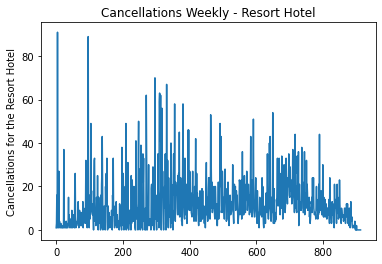

In [44]:
plt.plot(newdf['is_canceled'])
plt.ylabel('Cancellations for the Resort Hotel')
plt.title("Cancellations Weekly - Resort Hotel")
plt.show()

In [45]:
#for reading data
import pandas as pd
#for plots
import matplotlib.pyplot as plt
%matplotlib inline
#for manipulating the TS data
from statsmodels.tsa.seasonal import seasonal_decompose
#numpy
import numpy as np

In [46]:
#set the date as the index of the dataframe
newdf["Date"] = pd.to_datetime(newdf['Date'])
newdf.index = newdf.Date



In [47]:
ts_col = "is_canceled"  #the name of the column with the TS data
#Get all the values of the third field as a numpy array
tsdata = newdf[ts_col].to_numpy()


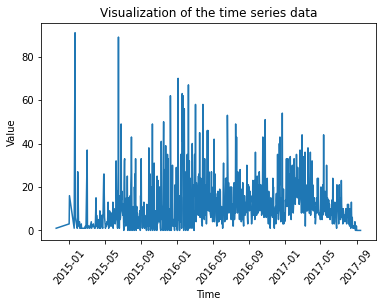

In [48]:
#plot the data
#plt.figure(figsize = (40,40))
plt.plot(newdf["Date"], tsdata)
plt.xlabel("Time")
plt.ylabel("Value")
plt.xticks(rotation = 50)
plt.title("Visualization of the time series data")
plt.show()

C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


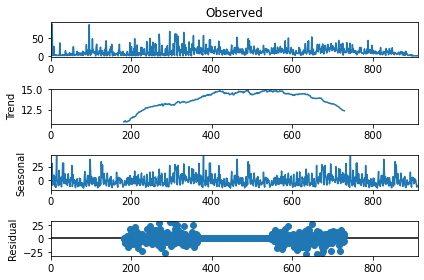

In [49]:
result = seasonal_decompose(tsdata, model='additive', freq = 365)
result.plot()
plt.show()

In [50]:
newdf[ts_col]


Date
2014-11-18     1
2015-01-01     3
2015-01-02    16
2015-01-18     1
2015-01-21    91
              ..
2017-09-08     0
2017-09-09     0
2017-09-10     0
2017-09-12     0
2017-09-14     0
Name: is_canceled, Length: 913, dtype: int64

In [51]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 


stepwise_fit = auto_arima(newdf[ts_col], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 7, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore',  suppress_warnings = True,stepwise = True) 

stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=7361.351, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=7098.640, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=6878.326, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=7359.430, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=7363.109, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=6879.755, Time=0.69 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=6879.796, Time=1.14 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=7099.506, Time=0.31 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=6881.460, Time=1.61 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=6889.412, Time=0.35 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=6866.776, Time=0.90 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=7356.769, Time=0.37 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=6868.424, Time=1.03 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  913
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -3424.263
Date:                           Thu, 26 Nov 2020   AIC                           6858.526
Time:                                   00:04:03   BIC                           6882.571
Sample:                                        0   HQIC                          6867.709
                                           - 913                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6800      0.067    -10.206      0.000      -0.811      -0.549
ar.L2          0.1939      0.030      6.417      0.000       0.135       0.253
ma.L1          0.8217      0.064     12.928      0.000       0.697       0.946
ma.S.L7       -0.8758      0.014    -62.229      0.000      -0.903      -0.848
sigma2       110.9999      2.496     44.464      0.000     106.107     115.893
===================================================================================
Ljung-Box (Q):                       64.99   Jarque-Bera (JB):              3302.38
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h3>SARIMAX <h3>

In [52]:
# Data Split to train and test sets 
train = newdf.iloc[:len(newdf)-200] 
test = newdf.iloc[len(newdf)-200:] 

from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train[ts_col], order = (2, 0, 1), seasonal_order =(0, 1, 1, 7)) 

modelf = model.fit() 
modelf.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       is_canceled   No. Observations:                  713
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -2720.760
Date:                           Thu, 26 Nov 2020   AIC                           5451.521
Time:                                   00:04:04   BIC                           5474.319
Sample:                                        0   HQIC                          5460.330
                                           - 713                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6855      0.078     -8.803      0.000      -0.838      -0.533
ar.L2          0.1925      0.036      5.409      0.000       0.123       0.262
ma.L1          0.8260      0.074     11.168      0.000       0.681       0.971
ma.S.L7       -0.9054      0.014    -63.260      0.000      -0.934      -0.877
sigma2       128.0095      3.373     37.953      0.000     121.399     134.620
===================================================================================
Ljung-Box (Q):                       45.24   Jarque-Bera (JB):              2104.41
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

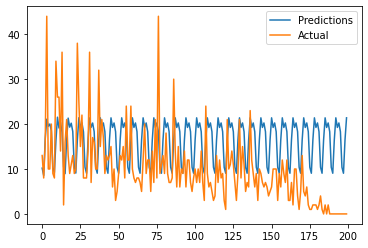

In [53]:
s = len(train) 
e = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = modelf.predict(s, e, typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.reset_index()['Predictions'].plot(legend = True) 
test[ts_col].reset_index()[ts_col].rename('Actual').plot(legend = True)


In [56]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
print("RMSE: ",rmse(test[ts_col], predictions)) 

# Calculate mean squared error 
print("MSE: ",mean_squared_error(test[ts_col], predictions)) 


RMSE:  10.326372377454387
MSE:  106.63396647785295
